In [3]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [1]:
# import os

# def combine_csv_files(folder_path):
#     # Lista para almacenar todos los DataFrames
#     df_list = []
    
#     # Recorrer todos los archivos en la carpeta
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):
#             file_path = os.path.join(folder_path, filename)
#             # Leer cada archivo CSV y agregarlo a la lista
#             df = pd.read_csv(file_path)
#             df_list.append(df)
    
#     # Combinar todos los DataFrames en uno solo
#     combined_df = pd.concat(df_list, ignore_index=True)
    
#     return combined_df

# # Ejemplo de uso
# folder_path_2019 = r'C://Users//Facu//Downloads//EE_landsat_corregido'
# combined_df = combine_csv_files(folder_path_2019)

In [9]:
combined_df = pd.read_csv(r"C:\Users\Facu\Downloads\Datos_RF_2020_corregidos.csv")

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113441 entries, 0 to 113440
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   system:index       113441 non-null  int64  
 1   EVI                113441 non-null  float64
 2   HH_dB              113441 non-null  float64
 3   HH_dB_Contrast     113441 non-null  float64
 4   HH_dB_Correlation  113441 non-null  float64
 5   HH_dB_Entropy      113441 non-null  float64
 6   HH_dB_Inertia      113441 non-null  float64
 7   HH_div_HV          113441 non-null  float64
 8   HH_minus_HV        113441 non-null  float64
 9   HH_plus_HV         113441 non-null  float64
 10  HV_dB              113441 non-null  float64
 11  HV_dB_Contrast     113441 non-null  float64
 12  HV_dB_Correlation  113441 non-null  float64
 13  HV_dB_Entropy      113441 non-null  float64
 14  HV_dB_Inertia      113441 non-null  float64
 15  MNDWI              113441 non-null  float64
 16  NB

In [12]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.describe()

,system:index,EVI,HH_dB,HH_dB_Contrast,HH_dB_Correlation,HH_dB_Entropy,HH_dB_Inertia,HH_div_HV,HH_minus_HV,HH_plus_HV,...,SR_B3,SR_B4,SR_B5,agbd,agbd_1,agbd_se,aspect,elevation,slope,threshold
count,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,...,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000,113441.000000
mean,56720.000000,1.154458,-14.658998,6.602547,0.679332,3.381383,6.602547,0.598745,9.685153,-39.003148,...,10764.251734,14615.518344,16177.296555,25.552751,25.552751,4.295267,164.234873,667.876420,6.006833,91.082815
std,32747.740281,8.239647,4.451446,211.613149,0.097909,0.411031,211.613149,0.100361,2.971184,10.046980,...,977.204351,1301.000338,1997.031880,77.001302,77.001302,3.412828,104.863079,300.167695,7.293165,84.634876
min,0.000000,-1201.500000,-188.596338,0.117045,0.037797,0.539703,0.117045,-5.250214,-127.012803,-447.036426,...,7589.000000,8341.000000,7533.000000,0.709250,0.709250,2.981795,-0.000000,48.000000,0.000000,0.230792
25%,28360.000000,0.671945,-17.335008,1.664318,0.616023,3.117833,1.664318,0.549961,7.778424,-44.766720,...,10154.000000,13912.000000,15042.000000,2.240774,2.240774,2.996555,76.486870,501.000000,2.088594,22.141877
50%,56720.000000,0.917085,-14.712642,2.293182,0.685357,3.387888,2.293182,0.609187,9.434180,-38.974759,...,10811.000000,14591.500000,16342.500000,5.942666,5.942666,3.005378,160.871640,646.000000,3.423764,65.412737
75%,85080.000000,1.366695,-11.954647,3.190227,0.749151,3.648050,3.190227,0.660582,11.274963,-33.019186,...,11427.000000,15276.500000,17526.500000,17.681269,17.681269,4.194024,258.376070,743.000000,6.391292,138.696965
max,113440.000000,1296.282051,255.432063,30535.968182,0.943509,5.138958,30535.968182,1.085500,133.651646,637.876929,...,15669.500000,25932.000000,23788.000000,2873.883300,2873.883300,17.361689,359.096650,2863.000000,77.616760,424.342333


In [13]:
df_filtered = combined_df[combined_df['threshold'] <100]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76080 entries, 0 to 113437
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       76080 non-null  int64  
 1   EVI                76080 non-null  float64
 2   HH_dB              76080 non-null  float64
 3   HH_dB_Contrast     76080 non-null  float64
 4   HH_dB_Correlation  76080 non-null  float64
 5   HH_dB_Entropy      76080 non-null  float64
 6   HH_dB_Inertia      76080 non-null  float64
 7   HH_div_HV          76080 non-null  float64
 8   HH_minus_HV        76080 non-null  float64
 9   HH_plus_HV         76080 non-null  float64
 10  HV_dB              76080 non-null  float64
 11  HV_dB_Contrast     76080 non-null  float64
 12  HV_dB_Correlation  76080 non-null  float64
 13  HV_dB_Entropy      76080 non-null  float64
 14  HV_dB_Inertia      76080 non-null  float64
 15  MNDWI              76080 non-null  float64
 16  NBR                76080 n

In [15]:
def remove_outliers(df, column_name):

    mean = df[column_name].mean()
    std_dev = df[column_name].std()    
    threshold = 3 * std_dev    
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))    
    df_filtered = df[condition]
    
    return df_filtered

df_filtered_remove = remove_outliers(df_filtered, "agbd")
df_filtered_remove.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75197 entries, 0 to 113437
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       75197 non-null  int64  
 1   EVI                75197 non-null  float64
 2   HH_dB              75197 non-null  float64
 3   HH_dB_Contrast     75197 non-null  float64
 4   HH_dB_Correlation  75197 non-null  float64
 5   HH_dB_Entropy      75197 non-null  float64
 6   HH_dB_Inertia      75197 non-null  float64
 7   HH_div_HV          75197 non-null  float64
 8   HH_minus_HV        75197 non-null  float64
 9   HH_plus_HV         75197 non-null  float64
 10  HV_dB              75197 non-null  float64
 11  HV_dB_Contrast     75197 non-null  float64
 12  HV_dB_Correlation  75197 non-null  float64
 13  HV_dB_Entropy      75197 non-null  float64
 14  HV_dB_Inertia      75197 non-null  float64
 15  MNDWI              75197 non-null  float64
 16  NBR                75197 n

In [16]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75197 entries, 0 to 113437
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   system:index       75197 non-null  int64  
 1   EVI                75197 non-null  float64
 2   HH_dB              75197 non-null  float64
 3   HH_dB_Contrast     75197 non-null  float64
 4   HH_dB_Correlation  75197 non-null  float64
 5   HH_dB_Entropy      75197 non-null  float64
 6   HH_dB_Inertia      75197 non-null  float64
 7   HH_div_HV          75197 non-null  float64
 8   HH_minus_HV        75197 non-null  float64
 9   HH_plus_HV         75197 non-null  float64
 10  HV_dB              75197 non-null  float64
 11  HV_dB_Contrast     75197 non-null  float64
 12  HV_dB_Correlation  75197 non-null  float64
 13  HV_dB_Entropy      75197 non-null  float64
 14  HV_dB_Inertia      75197 non-null  float64
 15  MNDWI              75197 non-null  float64
 16  NBR                75197 n

In [18]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['.geo','system:index', 'agbd_se','agbd_1','threshold']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75197 entries, 0 to 113437
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVI                75197 non-null  float64
 1   HH_dB              75197 non-null  float64
 2   HH_dB_Contrast     75197 non-null  float64
 3   HH_dB_Correlation  75197 non-null  float64
 4   HH_dB_Entropy      75197 non-null  float64
 5   HH_dB_Inertia      75197 non-null  float64
 6   HH_div_HV          75197 non-null  float64
 7   HH_minus_HV        75197 non-null  float64
 8   HH_plus_HV         75197 non-null  float64
 9   HV_dB              75197 non-null  float64
 10  HV_dB_Contrast     75197 non-null  float64
 11  HV_dB_Correlation  75197 non-null  float64
 12  HV_dB_Entropy      75197 non-null  float64
 13  HV_dB_Inertia      75197 non-null  float64
 14  MNDWI              75197 non-null  float64
 15  NBR                75197 non-null  float64
 16  NDBI               75197 n

In [19]:
features = [col for col in df_modified.columns if col not in ['.geo', 'system:index']]
print(features)

['EVI', 'HH_dB', 'HH_dB_Contrast', 'HH_dB_Correlation', 'HH_dB_Entropy', 'HH_dB_Inertia', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV_dB', 'HV_dB_Contrast', 'HV_dB_Correlation', 'HV_dB_Entropy', 'HV_dB_Inertia', 'MNDWI', 'NBR', 'NDBI', 'NDVI', 'RVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'agbd', 'aspect', 'elevation', 'slope']


In [21]:
feature_names =  ['B11', 'B12', 'B2', 'B3', 'B4', 'B8',  'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI', 'SAVI', 'VH', 'VH_Contrast', 'VH_Correlation', 'VH_Entropy', 'VH_Inertia', 'VV', 'VV_Contrast', 'VV_Correlation', 'VV_Entropy', 'VV_Inertia', 'VV_minus_VH', 'VV_plus_VH', 'agbd', 'aspect', 'elevation', 'slope']

optico = ['slope','SR_B2','SR_B3','HV_dB','elevation','aspect','SR_B1','EVI','HH_minus_HV','HV_dB_Contrast','HV_dB_Inertia','HV_dB_Contrast','HH_plus_HV','MNDWI','SR_B5','NDBI','agbd']

radar = ['CH', 'B8','elevation', 'slope', 'NDBI', 'VV_minus_VH' , 'EVI',  'VH_Entropy', 'B11', 'aspect','VV_Correlation', 'VV', 'agbd']


# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# feature_names_reduced =  ['agbd','NDBI','MNDWI','HV_dB','SR_B4','SR_B3','elevation','slope','EVI','HV_dB_Entropy','HV_dB_Correlation','SR_B2','HH_dB_Correlation','SR_B1','aspect']

df_reduce = df_modified[optico]

In [22]:
y = df_reduce['agbd']
X = df_reduce.drop(columns=['agbd'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75197 entries, 0 to 113437
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   slope           75197 non-null  float64
 1   SR_B2           75197 non-null  float64
 2   SR_B3           75197 non-null  float64
 3   HV_dB           75197 non-null  float64
 4   elevation       75197 non-null  int64  
 5   aspect          75197 non-null  float64
 6   SR_B1           75197 non-null  float64
 7   EVI             75197 non-null  float64
 8   HH_minus_HV     75197 non-null  float64
 9   HV_dB_Contrast  75197 non-null  float64
 10  HV_dB_Inertia   75197 non-null  float64
 11  HV_dB_Contrast  75197 non-null  float64
 12  HH_plus_HV      75197 non-null  float64
 13  MNDWI           75197 non-null  float64
 14  SR_B5           75197 non-null  float64
 15  NDBI            75197 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 9.8 MB


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [42]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],    
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 38.33047503237241
R^2 Score: 0.6275590168251983


In [24]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 75, random_state=42) 

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 32.49594486937654
R^2 Score: 0.5146584700702872


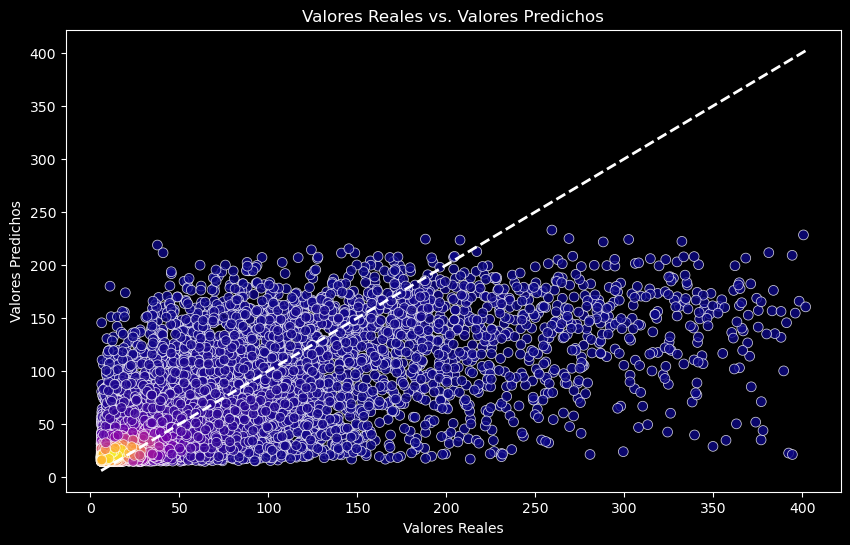

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

              Feature  Importance
28              slope    0.208930
22              SR_B2    0.202593
23              SR_B3    0.199364
9               HV_dB    0.096883
27          elevation    0.028874
26             aspect    0.021168
21              SR_B1    0.019828
0                 EVI    0.019712
7         HH_minus_HV    0.018886
10     HV_dB_Contrast    0.017494
13      HV_dB_Inertia    0.016790
12      HV_dB_Entropy    0.015664
8          HH_plus_HV    0.013768
25              SR_B5    0.012114
4       HH_dB_Entropy    0.011474
24              SR_B4    0.010568
3   HH_dB_Correlation    0.009580
1               HH_dB    0.009563
14              MNDWI    0.009361
11  HV_dB_Correlation    0.009352
16               NDBI    0.007535
15                NBR    0.006867
19         RVI_palsar    0.006797
2      HH_dB_Contrast    0.006245
5       HH_dB_Inertia    0.006154
6           HH_div_HV    0.004689
17               NDVI    0.003576
20               SAVI    0.003256
18            

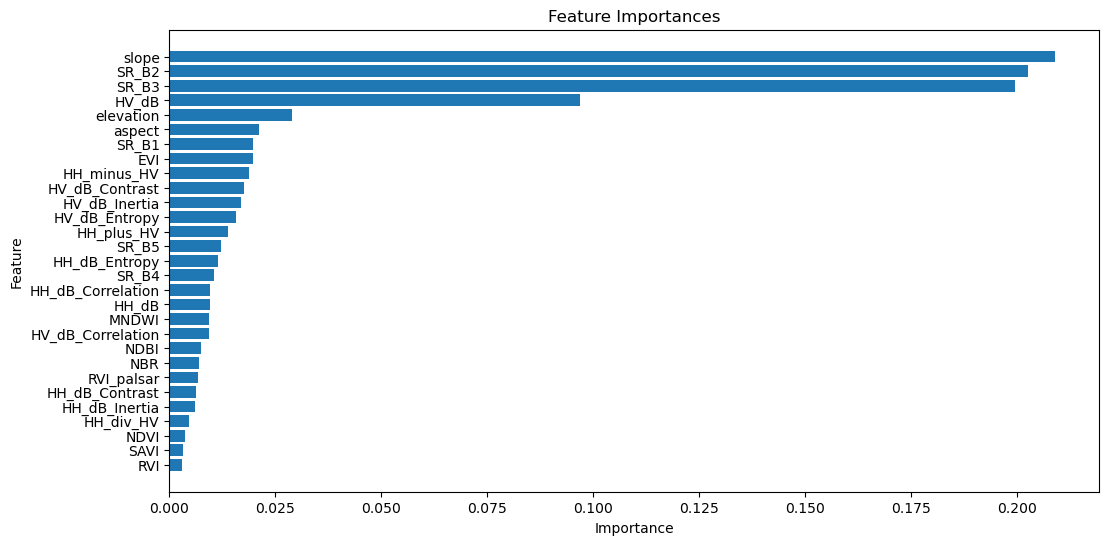

In [54]:
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [25]:
feature_names_reduced = ['slope','SR_B2','SR_B3','HV_dB','elevation','aspect','SR_B1','EVI','HH_minus_HV','HV_dB_Contrast','HV_dB_Inertia','HV_dB_Contrast','HH_plus_HV','MNDWI','SR_B5','NDBI']

trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)

In [26]:
# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names_reduced,output_mode='regression')

user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_malambique_HLS_tresh"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [22]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=11):
    trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_Malambique"
export_model_in_parts(rf, feature_names_reduced, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_Malambique_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_Malambique_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_Malambique_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_Malambique_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_Malambique_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_Malambique_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_Malambique_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_Malambique_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_Malambique_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_Malambique_part_9


In [60]:
import numpy as np
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Función para entrenar modelos utilizando bootstrap
def bootstrap_models(X_train, y_train, X_test, y_test, n_models=10, random_state=42):

    models = []
    r2_scores = []

    for i in range(n_models):
        # Crear una muestra bootstrap del conjunto de entrenamiento
        X_train_bootstrap, y_train_bootstrap = resample(
            X_train, y_train, replace=True, n_samples=len(y_train), random_state=random_state + i
        )
        
        # Entrenar el modelo en la muestra bootstrap
        model = RandomForestRegressor(
            bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2,
            n_estimators=50, random_state=random_state + i
        )
        model.fit(X_train_bootstrap, y_train_bootstrap)
        
        # Evaluar el modelo en el conjunto de prueba
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        models.append(model)
        
        print(f"Modelo {i+1} entrenado con muestra bootstrap. R²: {r2:.4f}")
    
    return models, r2_scores

# Función para convertir y subir los modelos a GEE
def upload_models_to_gee(models, feature_names_reduced, user_id, base_asset_name="Rf_Bootstrap"):
    """
    Convierte cada modelo en la lista 'models' a formato de string compatible con GEE y sube cada uno como un asset.
    
    Args:
        models: Lista de modelos entrenados.
        feature_names_reduced: Lista de nombres de las características usadas en el modelo.
        user_id: ID del usuario de GEE (ej. 'users/tu_usuario').
        base_asset_name: Prefijo del nombre de los assets a subir en GEE.
    """
    for i, model in enumerate(models):
        # Convertir el modelo a cadenas
        trees = ml.rf_to_strings(model, feature_names_reduced, output_mode='regression')
        
        # Especificar el ID del asset para este modelo
        asset_id = f"{user_id}/{base_asset_name}_model_{i+1}"
        
        # Iniciar el proceso de exportación para cada modelo
        ml.export_trees_to_fc(trees, asset_id)
        print(f"Modelo {i+1} subido a GEE con asset_id: {asset_id}")

# Lista de características reducidas (modifica si es necesario)
feature_names_reduced = ['slope','SR_B2','SR_B3','HV_dB','elevation','aspect','SR_B1','EVI','HH_minus_HV','HV_dB_Contrast','HV_dB_Inertia','HV_dB_Contrast','HH_plus_HV','MNDWI','SR_B5','NDBI']

# Entrenar los modelos utilizando la función bootstrap_models
models, r2_scores = bootstrap_models(X_train, y_train, X_test, y_test, n_models=10)

# ID de usuario en GEE
user_id = 'users/facuboladerasgee'  # Cambia a tu usuario de GEE

# Llamar a la función para subir los modelos
upload_models_to_gee(models, feature_names_reduced, user_id)

Modelo 1 entrenado con muestra bootstrap. R²: 0.5215
Modelo 2 entrenado con muestra bootstrap. R²: 0.5277
Modelo 3 entrenado con muestra bootstrap. R²: 0.5219
Modelo 4 entrenado con muestra bootstrap. R²: 0.5200
Modelo 5 entrenado con muestra bootstrap. R²: 0.5195
Modelo 6 entrenado con muestra bootstrap. R²: 0.5207
Modelo 7 entrenado con muestra bootstrap. R²: 0.5240
Modelo 8 entrenado con muestra bootstrap. R²: 0.5223
Modelo 9 entrenado con muestra bootstrap. R²: 0.5217
Modelo 10 entrenado con muestra bootstrap. R²: 0.5197
Modelo 1 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_model_1
Modelo 2 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_model_2
Modelo 3 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_model_3
Modelo 4 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_model_4
Modelo 5 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstrap_model_5
Modelo 6 subido a GEE con asset_id: users/facuboladerasgee/Rf_Bootstr